# Data Structures & Algorithms in Python

## Overview:
1. Introduction & Efficiency
    - Syntax
    - Efficiency
    - Notation of Efficiency
2. List-Based Collections
    - Lists/Arrays
    - Linked Lists
    - Stacks
    - Queues
3. Searching & Sorting
    - Binary Search
    - Recursion
    - Bubble Sort
    - Merge Sort
    - Quick Sort
4. Maps & Hashing
    - Maps
    - Hashing
    - Collisions
    - Hashing Conventions
5. Trees
    - Trees
    - Tree Traversal
    - Binary Trees
    - Binary Search Trees
    - Heaps
    - Self-Balancing Trees
6. Graphs
    - Graphs
    - Graph Properties
    - Graph Representation
    - Graph Traversal
    - Graph Paths
7. Case Studies in Algorithms
    - Shortest Path Problem
    - Knapsack Problem
    - Traveling Salesman Problem
8. Technical Interview Tips
    - Find the Number of Islands

## 1. Efficiency

Notation: O(n)

- [Time Complexity](https://en.wikipedia.org/wiki/Time_complexity#Table_of_common_time_complexities)
> Time complexity is commonly estimated by counting the number of elementary operations performed by the algorithm, supposing that each elementary operation takes a fixed amount of time to perform.
- Approximation: about how many computations must be performed for the data structure of input
- Worst Case Scenario: upper bound
- Space Efficiency

- Big-O cheat sheet (http://bigocheatsheet.com)
![title](img/BigOComplexityChart.png)

![title](img/Efficiency_CommonDataStructureOperations.png)

![title](img/Efficiency_ArraySortingAlgorithms.png)

## 2. List-Based Collections
> Data Structure: extension of collections

### Lists

- ([TimeComplexity](https://wiki.python.org/moin/TimeComplexity)): a list is internally represented as an array 
- Arrays: index - location
        - inefficient by insertion: O(n), shift elements to make space
        - Delete an element
      

### Linked List
    - ordered, no index
    - memory address of the next element
    - easy to add/delete element: change the pointer in next component
    - doubly linked lists
    - no such built-in data structure in Python

In [1]:
# define through class
class Element(object):
    def __init__(self, value):
        self.value = value
        self.next = None

In [2]:
class LinkedList(object):
    def __init__(self, head=None):
        self.head = head
        
    def append(self, new_element):
        current = self.head
        if self.head:
            while current.next:
                current = current.next
            current.next = new_element
        else:
            self.head = new_element
        
    def get_position(self, position):
        counter = 1
        current = self.head
        if position < 1:
            return None
        while current and counter <= position:
            if counter == position:
                return current
            current = current.next
            counter += 1
        return None
    
    def insert(self, new_element, position):
        counter = 1
        current = self.head
        if position > 1:
            while current and counter < position:
                if counter == position - 1:
                    new_element.next = current.next
                    current.next = new_element
                current = current.next
                counter += 1
        elif position == 1:
            new_element.next = self.head
            self.head = new_element
            
    def delete(self, value):
        current = self.head
        previous = None
        while current.value != value and current.next:
            previous = current
            current = current.next
        if current.value == value:
            if previous:
                previous.next = current.next
            else:
                self.head = current.next

In [3]:
e1 = Element(1)
e2 = Element(2)
e3 = Element(3)

LL = LinkedList(e1)
LL.append(e2)
LL.append(e3)

print(LL.get_position(2).value)

2


### Stacks

- put elements on top, with easy access to remove or look at the most recent element
    - push(入栈): O(1)
    - pop(出栈): O(1)
    - L.I.F.O.: Last In, First Out
    
> stack functionality is already built into Python list:
- pop()
- append()

In [4]:
class Element(object):
    def __init__(self, value):
        self.value = value
        self.next = None
        
class LinkedList(object):
    def __init__(self, head=None):
        self.head = head
    
    def append(self, new_element):
        current = self.head
        if self.head:
            while current.next:
                current = current.next
            current.next = new_element
        else:
            self.head = new_element
    
    def insert_first(self, new_element):
        new_element.next = self.head
        self.head = new_element
        
    def delete_first(self):
        if self.head:
            deleted_element = self.head
            tmp = deleted_element.next
            self.head = tmp
            return deleted_element
        else:
            return None
        
class Stack(object):
    def __init__(self, top=None):
        self.ll = LinkedList(top)
        
    def push(self, new_element):
        self.ll.insert_first(new_element)
        
    def pop(self):
        return self.ll.delete_first()

In [5]:
e1 = Element(1)
e2 = Element(2)
e3 = Element(3)

stack = Stack(e1)
stack.push(e2)
stack.push(e3)
print(stack.pop().value)
print(stack.pop().value)
print(stack.pop().value)
print(stack.pop())

3
2
1
None


### Queues
- first in first out structure
    - Enqueue: add an element to the Tail
    - Dequeue: remove the Head element
    - Peek: look at the Head element
    - **Deque**: double ended 
    - **Priority Queue**
    
> it is possible to use a list as a queue in Python, however lists are not efficient. While appends and pops from the end of list are fast, doing inserts or pops from the beginning of a list is slow (all other elements must be shifted by one)

In [6]:
from collections import deque
queue = deque(['A', 'B', 'C'])
queue.append('D')
queue.append('E')

In [7]:
queue

deque(['A', 'B', 'C', 'D', 'E'])

In [8]:
queue.popleft()

'A'

In [9]:
queue

deque(['B', 'C', 'D', 'E'])

In [10]:
# make a Queue class using a list
class Queue:
    def __init__(self, head=None):
        self.storage = [head]
    
    def enqueue(self, new_element):
        self.storage.append(new_element)
    
    def peek(self):
        return self.storage[0]
    
    def dequeue(self):
        return self.storage.pop(0)

In [11]:
q = Queue(1)
q.enqueue(2)
q.enqueue(3)

print(q.peek())
print(q.dequeue())

1
1


## 3. Search & Sorting Algorithm

**Overview**
    - Binary Search
    - Recursion
    - Sorting

### Binary Search (二分法)
    - start from one end: O(n)
    - start from the middle: O(log(n))

In [12]:
def binary_search(listData, value):
    low = 0
    high = len(listData) - 1
    while low <= high:
        mid = int((low+high)/2)
        if listData[mid] == value:
            return mid
        elif listData[mid] < value:
            low = mid +1
        else:
            high = mid -1
    return -1

In [13]:
test = [1, 10, 13, 21, 34, 44, 52, 68, 73, 94, 100]
val = 73
binary_search(test, val)

8

### Recursion (递归)
    - function that calls itself
    - be careful with infinite recursion
    - pseudocode:
    ```
    func recursive(input):
        if input <= 0
            return input
        else
            output = recursive(input - 1)
            return output
    ```
        - step 1: call itself at some point
        - step 2: base case -> exit condition
        - step 3: alter the input or change variable every iteration

In [14]:
# Fibonacci Sequence
def fib(position):
    if position == 0 or position == 1:
        return position
    return fib(position - 1) + fib(position -2)

In [15]:
fib(10) # 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55

55

In [16]:
# Factorial
def factorial(n):
    if n == 0 or n == 1:
        return n
    return n*factorial(n-1)

In [17]:
factorial(5) # 5! = 5*4*3*2*1 = 120

120

> In practice if we were to use recursion to solve this problem we should use a hash table to store and fetch previously calculated results. This will increase the space needed but will drastically improve the runtime efficiency.

### Sorting (排序)

    - naive approach
    - inplace (原地排序): rearrange locally without copying to new data structure, low space complexity
    - tradeoff: less space or less time

- **Bubble Sort** 
    - naive approach: O(n\*n) = O(n^2)
    - Complexity:
        | n = # of elements | # of iterations = (n-1) times; # of comparisons each iteration: (n-1) times | (n-1)\*(n-1)
    - Time:
         - Worst Case: O(n^2) comparions, O(n^2) swaps
         - Average Case: O(n^2) comparisons, O(n^2) swaps
         - Best Case: O(n) comparisons, O(1) swaps
    - Space: O(1) (inplace sorting, no need for extra data structures)

In [18]:
def bubble_sort(listData):
    issorted = False
    while not issorted:
        issorted = True
        for i in range(len(listData)-1):
            if listData[i] > listData[i+1]:
                issorted = False
                listData[i], listData[i+1] = listData[i+1], listData[i]

In [19]:
test = [5, 12, 3, 13, 8, 23, 21, 39, 22, 15]
bubble_sort(test)
test

[3, 5, 8, 12, 13, 15, 21, 22, 23, 39]

> set a flag to indicate the status of list, if it is well sorted or not -> start the while loop -> assume the list well sorted at first (flag set to be True) -> compare two adjacent elements -> if they are found not in correct order, set flag back to False (the flag only remains true during the last round, when all elements are correctly sorted) [Q&A@stackoverflow](https://stackoverflow.com/questions/895371/bubble-sort-homework)

- **Merge Sort (归并排序)**
    - recursive
    - Divide and Conquer (分治法)
        - divide the unsorted list into multiple sublists
        - combine multiple ordered arrays to make one larger ordered array
    - Time complexity: O(nlog(n)) - sort an array of N items in time proportional to NlogN
    - Auxiliary Space: O(n) - uses extra space proportional to N
    - Reference: [MERGESORT in Java](https://algs4.cs.princeton.edu/22mergesort/)

> **Top-down implementation**: recursively splits the list into sublists until sublist size is 1, then merges those sublists to produce a sorted list

![title](img/mergesortTD-bars.png)

In [20]:
def merge_sort(listData):
    if len(listData) <= 1:
        return listData
    left = []
    right = []
    # divide
    mid = int(len(listData)/2)
    print('Before Divide: ', listData)
    left = listData[:mid]
    right = listData[mid:]

    # merge        
    left = merge_sort(left)
    right = merge_sort(right)
    print('Left: ', left)
    print('Right: ', right)
    print('After Merge: ', merge(left, right))
    return merge(left, right)

def merge(left, right):
    result = []
    while left and right:
        if left[0] <= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]
    
    while left:
        result.append(left[0])
        left = left[1:]
    while right:
        result.append(right[0])
        right = right[1:]
    
    return result

In [21]:
test = [5, 12, 3, 13, 8, 23, 21, 39, 22, 15]
test = merge_sort(test)
test

Before Divide:  [5, 12, 3, 13, 8, 23, 21, 39, 22, 15]
Before Divide:  [5, 12, 3, 13, 8]
Before Divide:  [5, 12]
Left:  [5]
Right:  [12]
After Merge:  [5, 12]
Before Divide:  [3, 13, 8]
Before Divide:  [13, 8]
Left:  [13]
Right:  [8]
After Merge:  [8, 13]
Left:  [3]
Right:  [8, 13]
After Merge:  [3, 8, 13]
Left:  [5, 12]
Right:  [3, 8, 13]
After Merge:  [3, 5, 8, 12, 13]
Before Divide:  [23, 21, 39, 22, 15]
Before Divide:  [23, 21]
Left:  [23]
Right:  [21]
After Merge:  [21, 23]
Before Divide:  [39, 22, 15]
Before Divide:  [22, 15]
Left:  [22]
Right:  [15]
After Merge:  [15, 22]
Left:  [39]
Right:  [15, 22]
After Merge:  [15, 22, 39]
Left:  [21, 23]
Right:  [15, 22, 39]
After Merge:  [15, 21, 22, 23, 39]
Left:  [3, 5, 8, 12, 13]
Right:  [15, 21, 22, 23, 39]
After Merge:  [3, 5, 8, 12, 13, 15, 21, 22, 23, 39]


[3, 5, 8, 12, 13, 15, 21, 22, 23, 39]

> **Bottom-up implementation**: treats the list as an array of n sublists of size 1, and iteratively merges sublists back and forth between two buffers

In [22]:
def merge_sort(listData):
    if not listData:
        return listData
    
    sublists = [[x] for x in listData]
    print('Original list: ', listData)
    print('Splitted into: ', sublists)
    print('Merging...')
    i = 1
    while len(sublists) > 1:
        sublists = merge_lists(sublists)
        print('After Merge #{}: {}'.format(i,sublists))
        i += 1
    return sublists[0]


def merge_lists(sublists):
    result = []
    for i in range(0, len(sublists)//2):
        result.append(merge(sublists[i*2], sublists[i*2+1]))
    if len(sublists) % 2:
        result.append(sublists[-1])
    return result


def merge(left, right):
    result = []
    while left and right:
        if left[0] <= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]
    
    while left:
        result.append(left[0])
        left = left[1:]
    while right:
        result.append(right[0])
        right = right[1:]
    
    return result        

In [23]:
test = [5, 12, 3, 13, 20, 8, 23, 21, 39, 22, 15]
merge_sort(test)

Original list:  [5, 12, 3, 13, 20, 8, 23, 21, 39, 22, 15]
Splitted into:  [[5], [12], [3], [13], [20], [8], [23], [21], [39], [22], [15]]
Merging...
After Merge #1: [[5, 12], [3, 13], [8, 20], [21, 23], [22, 39], [15]]
After Merge #2: [[3, 5, 12, 13], [8, 20, 21, 23], [15, 22, 39]]
After Merge #3: [[3, 5, 8, 12, 13, 20, 21, 23], [15, 22, 39]]
After Merge #4: [[3, 5, 8, 12, 13, 15, 20, 21, 22, 23, 39]]


[3, 5, 8, 12, 13, 15, 20, 21, 22, 23, 39]

- **Quick Sort**
    - divide and conquer: first divides a large array into two smaller sub-arrays, then recursively sort both
        - pick an element, called a _pivot_
        - partitioning: reorder the array so that all elements with values less than the pivot come before it, the other after it, after this partitioning, the pivot is in its final position
        - recursively apply the above steps to the sub-array of elements with smaller values and greater values separately
    - inplace sort -> space: O(1)
    - time complexity:
        - worse case: O(n^2) -> when pivot is already in the right place
        - average/best case: O(nlog(n)) -> pivot will move to middle every time
    - configure the program to run parallel, select the median of the last a few elements instead of the last element
    - [Analysis of QuickSort and Proof of Time Complexity](http://www.cs.swan.ac.uk/~csfm/Courses/CS_332/quicksort.pdf)
    - example: 
    > The shaded element is the pivot. It is always chosen as the last element of the partition. However, always choosing the last element in the partition as the pivot in this way results in poor performance (O(n²)) on already sorted arrays, or arrays of identical elements. Since sub-arrays of sorted / identical elements crop up a lot towards the end of a sorting procedure on a large set, versions of the quicksort algorithm that choose the pivot as the middle element run much more quickly than the algorithm described in this diagram on large sets of numbers.
    
    ![title](img/Quicksort-diagram.png)
    

In [24]:
# Lomuto partition scheme
def quick_sort(listData, low=0, high=-1):
    if high == -1:
        high = len(listData) - 1
    
    if low < high:
        pivot_idx = partition(listData, low, high)
        quick_sort(listData, low, pivot_idx-1)
        quick_sort(listData, pivot_idx+1, high)
    
    if high - low == len(listData) - 1:
        return listData
    
def partition(listData, low, high):
    mid = (low+high)//2
    if listData[mid] < listData[low]:
        swap(listData[mid], listData[low])
    if listData[high] < listData[low]:
        swap(listData[high], listData[low])
    if listData[mid] < listData[high]:
        swap(listData[high], listData[mid])
    pivot = listData[high]
    idx = low
    for i in range(low, high):
        if listData[i] <= pivot:
            listData[idx], listData[i] = listData[i], listData[idx]
            print(listData)
            idx += 1
    listData[idx], listData[high] = pivot, listData[idx]
    return idx

def swap(a,b):
    a, b = b, a
# after move every element smaller than pivot by swapping the place-holder for pivot and those elements,
# then swap the pivot with its place-holder, therefore the pivot is moved to its final position

In [25]:
test = [21, 4, 1, 3, 9, 20, 25, 6, 21, 14]
quick_sort(test)

[4, 21, 1, 3, 9, 20, 25, 6, 21, 14]
[4, 1, 21, 3, 9, 20, 25, 6, 21, 14]
[4, 1, 3, 21, 9, 20, 25, 6, 21, 14]
[4, 1, 3, 9, 21, 20, 25, 6, 21, 14]
[4, 1, 3, 9, 6, 20, 25, 21, 21, 14]
[4, 1, 3, 9, 6, 14, 25, 21, 21, 20]
[4, 1, 3, 9, 6, 14, 25, 21, 21, 20]
[4, 1, 3, 9, 6, 14, 25, 21, 21, 20]
[1, 4, 3, 6, 9, 14, 25, 21, 21, 20]
[1, 3, 4, 6, 9, 14, 20, 21, 21, 25]
[1, 3, 4, 6, 9, 14, 20, 21, 21, 25]
[1, 3, 4, 6, 9, 14, 20, 21, 21, 25]


[1, 3, 4, 6, 9, 14, 20, 21, 21, 25]

## 4. Maps & Hashing (映射 & 散列)
- **Map**
    - key-value pairs
    - map concept -> in Python: built-in data type > dictionary
    - Sets: collection of things without order, don't allow repeated elements


- **Hashing**: do look-ups in constant time 
    - list, set: do look-ups in linear time through every element
    - stack, queue: most recent or oldest element instantly
    - priority queue: element with highest priority
    
    - **Hash Function**: value -> hash value/hash code/hash/digest
        - any function that can be used to map data of arbitrary size onto data of fixed size
        - collisions: map several different keys to the same index 
            - domain of a hash function is larger than its range
            - each slot of a hash table is associated with a set of records (bucket)
            - hash value = bucket listing or bucket index
        - load factor = # of entries / # of buckets (载荷因子)
            - describe how full a hash table is
            - use as an indicator for when to rehash: sparse or full
            - greater than 1: guaranteed to have collisions
            
- **Hash Maps**:
    - <key, value> -> Hash Function on Key -> Hash Value <k,v> in Hash Table
    - string keys

In [26]:
class HashTable(object):
    def __init__(self):
        self.table = [None]*10000
    
    def store(self, string):
        idx = self.calculate_hash_value(string)
        if self.table[idx]:
            self.table[idx].append(string)
        else:
            self.table[idx] = [string]
            
    def lookup(self, string):
        idx = self.calculate_hash_value(string)
        if self.table[idx]:
            return idx
        else:
            return -1
        
    def calculate_hash_value(self, string):
        hash_value = ord(string[0]) * 100 + ord(string[1])
        return hash_value

In [27]:
hs = HashTable()

print(hs.lookup('TEST'))
hs.store('TEST')
print(hs.lookup('TEST'))
hs.store('TERM')
print(hs.lookup('TERM'))

-1
8469
8469


## 5. Trees
- Basics:
    - extension of a linked list
    - root -> node -> leaf (branch)
        - completely connected
        - no cycles
        - terminology:
            - level, parent-child relationship, ancestor-descendant, leaf/internal node, path, height, depth (inverse to height)
            - root: level 1, height=n, depth=0
            - leaf: level n+1, height=0, depth=n

- **Tree Traversal**
    - DFS: depth first search > explore child nodes, which have priority
        - Pre-Order: check off a node first before traversal
        - In-Order: first check off the leaf then the parent
        - Post-Order: first check off the leaf, if its parent has other leaves, check off them and then come back to check off the parent node
    - BFS: breadth first search > explore every node on the same level we are currently on before visiting child nodes


- Binary Trees: parent nodes have at most two children
    - Search: O(n)
    - Delete: O(n) -> the run time is linear
    - Insert: log(# of nodes at this level) = rank of level 


- **Binary Search Trees** (BST)
    - binary tree: parent node has most two children
    - sorted: node.left.value < node.value < node.right.value
    - search, insert, delete
    - complications: 
        - unbalanced: distribution of the nodes is skewed > worst case O(n) for search, insert, delete
        
- Heaps (not necessary BST)
    - root: maximum or minimum
    - max heap
    - min heap
    - complete
    - peek: O(1)
    - search: 
        - worst: O(n) - linear time operation
        - average: O(n/2) = O(n)
    - insert: first stick the element to the next empty spot, then heapify by comparing the child with parent, swap if needed
    - extract:
        - worst case: O(log(n)) = height of the tree
    - implementation: array (sorted, from left to right -> top-down)
    
- Self-Balancing Trees
    - tries to minimize the number of levels it uses
        - red-black tree (extension of BST)
            - color property
            - rule 2: existence of null leaf nodes (black)
            - rule 3: if a node is red, both of its children must be black
            - rule 4 (optional): root node is black
            - rule 5: every node to its descendant null nodes must contain the same number of black nodes
        - red-black tree + BST rules: insert red nodes only (change back to black if it is root node)
    - balanced tree: nodes condensed to only a few levels
    - unbalanced tree: nodes spread out among many levels
        - most extreme type: linked list, where every node has only one child
    

In [28]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        
        
class BinaryTree(object):
    def __init__(self, root):
        self.root = Node(root)
        
    def search(self, val):
        return self.preorder_search(self.root, val)
    
    def print_tree(self, mode='pre_order'):
        if mode == 'pre_order':
            return self.preorder_print(self.root, [])
        elif mode == 'in_order':
            return self.inorder_print(self.root, [])
        else:
            return self.postorder_print(self.root, [])
        
    def preorder_search(self, start, val):
        if start:
            if start.value == val:
                return True
            else:
                return self.preorder_search(start.left, val) or self.preorder_search(start.right, val)
        return False
    
    def preorder_print(self, start, traversal=[]):
        if start:
            traversal.append(start.value)
            traversal = self.preorder_print(start.left, traversal)
            traversal = self.preorder_print(start.right, traversal)
        return traversal
    
    def inorder_print(self, start, traversal=[]):
        if start:
            traversal = self.inorder_print(start.left, traversal)
            traversal.append(start.value)
            traversal = self.inorder_print(start.right, traversal)
        return traversal
    
    def postorder_print(self, start, traversal=[]):
        if start:
            traversal = self.postorder_print(start.left, traversal)
            traversal = self.postorder_print(start.right, traversal)
            traversal.append(start.value)
        return traversal

In [29]:
tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)

print(tree.search(4))
print(tree.print_tree(mode='post_order'))

True
[4, 5, 2, 3, 1]


In [30]:
# define a class for binary search tree
class BST(object):
    def __init__(self, root):
        self.root = Node(root)
        
    def insert(self, val):
        self.insert_helper(self.root, val)
        
    def insert_helper(self, node, val):
        if node.value < val:
            if node.right:
                self.insert_helper(node.right, val)
            else:
                node.right = Node(val)
        else:
            if node.left:
                self.insert_helper(node.left, val)
            else:
                node.left = Node(val)
            
    def search(self, val):
        return self.search_helper(self.root, val)
        
    def search_helper(self, node, val):
        if node:
            if node.value == val:
                return True
            elif node.value < val:
                 return self.search_helper(node.right, val)
            else:
                 return self.search_helper(node.left, val)
        return False
    
    def print_tree(self):
        return self.preorder_print(self.root, [])
    
    def preorder_print(self, start, traversal=[]):
        if start:
            traversal.append(start.value)
            traversal = self.preorder_print(start.left, traversal)
            traversal = self.preorder_print(start.right, traversal)
        return traversal
        

In [31]:
tree = BST(4)

tree.insert(2)
tree.insert(1)
tree.insert(3)
tree.insert(5)
tree.insert(6)
tree.insert(7)

print(tree.print_tree())
print(tree.search(3))

[4, 2, 1, 3, 5, 6, 7]
True


## 6. Graphs
- [Wiki](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))
- notations:
    - vertex (pl. vertices) (顶点)
    - edge (边)
- directions & cycles
    - inbound/outbound edge: relationship applys one way or both
    - undirected edges
    - cycle -> infinite loops?! -> acyclic
    - DAG: Directed Acyclic Graph
- connectivity -> which graph is stronger?
    - disconnected
    - weakly connected: 
    > A directed graph is weakly connected when only replacing all of the directed edges with undirected edges can cause it to be connected.
    - connected: undirected graphs, there is some path between one vertex and every other vertex
    - strongly connected: must have a path from every node and every other node

### Graph Representations
- OOP: vertex object, edge object
- Edge List: 2-D list
- Adjacency List: index - vertex ID, each space - list of nodes that vertex is adjacent to 
- Adjacency Matrices (邻接矩阵)
     - diagonal all zeros (only be one when the node start and end to itself)
     - symmetric about the diagonal

In [32]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.edges = []
        
class Edge(object):
    def __init__(self, value, node_from, node_to):
        self.value = value
        self.node_from = node_from
        self.node_to = node_to
        
class Graph(object):
    def __init__(self, nodes=[], edges=[]):
        self.nodes = nodes
        self.edges = edges
     
    # keep both nodes and edges updated when either is inserted
    def insert_node(self, new_node_val):
        new_node = Node(new_node_val)
        self.nodes.append(new_node)
        
    def insert_edge(self, new_edge_val, node_from_val, node_to_val):
        from_found = None
        to_found = None
        for node in self.nodes:
            if node_from_val == node.value:
                from_found = node
            if node_to_val == node.value:
                to_found = node
        if from_found == None:
            from_found = Node(node_from_val)
            self.nodes.append(from_found)
        if to_found == None:
            to_found = Node(node_to_val)
            self.nodes.append(to_found)
        new_edge = Edge(new_edge_val, from_found, to_found)
        from_found.edges.append(new_edge)
        to_found.edges.append(new_edge)
        self.edges.append(new_edge)
        
    def get_edge_list(self):
        return [(edge.value, edge.node_from.value, edge.node_to.value) for edge in self.edges]
    
    def get_adjacency_list(self):
        max_index = max([node.value for node in self.nodes])
        adjacency_list = [None for _ in range(max_index+1)]
        edge_list = self.get_edge_list()
        for edge_val, node_from_val, node_to_val in edge_list:
            if adjacency_list[node_from_val]:
                adjacency_list[node_from_val].append((node_to_val, edge_val))
            else:
                adjacency_list[node_from_val] = [(node_to_val, edge_val)]
        return adjacency_list
    
    def get_adjacency_matrix(self):
        max_index = max([node.value for node in self.nodes])
        adjacency_matrix = [[0]*(max_index+1) for _ in range(max_index+1)]
        edge_list = self.get_edge_list()
        for edge_val, node_from_val, node_to_val in edge_list:
            adjacency_matrix[node_from_val][node_to_val] = edge_val
        return adjacency_matrix

In [33]:
graph = Graph()
graph.insert_edge(100, 1, 2)
graph.insert_edge(101, 1, 3)
graph.insert_edge(102, 1, 4)
graph.insert_edge(103, 3, 4)
graph.insert_edge(104, 2, 5)

print(graph.get_edge_list())
print(graph.get_adjacency_list())
print(graph.get_adjacency_matrix())

[(100, 1, 2), (101, 1, 3), (102, 1, 4), (103, 3, 4), (104, 2, 5)]
[None, [(2, 100), (3, 101), (4, 102)], [(5, 104)], [(4, 103)], None, None]
[[0, 0, 0, 0, 0, 0], [0, 0, 100, 101, 102, 0], [0, 0, 0, 0, 0, 104], [0, 0, 0, 0, 103, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


In [34]:
# be careful when defining the initial adjacent list or matrix
# this makes a list with five references to the same list
# when assign value to a single value, it alters all five 
[[None]*5]*5

[[None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None]]

In [35]:
# use list comprehension instead to avoid and create multiple separate stand alone lists
[[None]*5 for _ in range(5)]

[[None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None]]

### Graph Traversal/Search:
- depth first search (深度优先搜索法)
    - follow one path as far as it goes, until there is no more unvisited adjacent nodes, go back to the last node which has unvisited adjacent nodes 
    - stack
    - recursion: O(|E|+|V|) explicitly visit every edge and vertex once/twice, |V| depends on the data structure used
        - base case: picking an edge, marking a node as seen until run out of new nodes to explore
        - move back to the last level of recursion: go back to the previous node in the search
- breadth first search (广度优先搜索法)
    > Breadth first traversal is accomplished by enqueueing each level of a tree sequentially as the root of any subtree is encountered.
    - Root case: The traversal queue is initially empty so the root node must be added before the general case.
    - General case: Process any items in the queue, while also expanding their children. Stop if the queue is empty. The general case will halt after processing the bottom level as leaf nodes have no children.
    
    - queue: add marked node to 
    - complexity: O(|E|+|V|)
    
- basic graph traversals can be implemented in more complicated graph-based algorithms

In [36]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.edges = []
        self.visited = False
        
        
class Edge(object):
    def __init__(self, value, node_from, node_to):
        self.value = value
        self.node_from = node_from
        self.node_to = node_to
        
        
class Graph(object):
    def __init__(self, nodes=None, edges=None):
        self.nodes = nodes or []
        self.edges = edges or []
        self.node_names = []
        self._node_map = {}
        
    def set_node_names(self, names):
        "Node numbers are 0 based"
        self.node_names = list(names)
        
    def insert_node(self, new_node_val):
        "Insert a new node with value new_node_val"
        new_node = Node(new_node_val)
        self.nodes.append(new_node)
        self._node_map[new_node_val] = new_node
        return new_node
    
    def insert_edge(self, new_edge_val, node_from_val, node_to_val):
        "Insert a new edge, create new nodes if necessary"
        nodes = {node_from_val: None, node_to_val: None}
        for node in self.nodes:
            if node.value in nodes:
                nodes[node.value] = node
                if all(nodes.values()):
                    break
        for node_val in nodes:
            nodes[node_val] = nodes[node_val] or self.insert_node(node_val)
        node_from = nodes[node_from_val]
        node_to = nodes[node_to_val]
        new_edge = Edge(new_edge_val, node_from, node_to)
        node_from.edges.append(new_edge)
        node_to.edges.append(new_edge)
        self.edges.append(new_edge)
        
    def get_edge_list(self):
        return [(e.value, e.node_from.value, e.node_to.value) for e in self.edges]
    
    def get_edge_list_names(self):
        return [(e.value, self.node_names[e.node_from.value],
                self.node_names[e.node_to.value]) for e in self.edges]
    
    def get_adjacency_list(self):
        max_index = max([node.value for node in self.nodes])
        adjacency_list = [[] for _ in range(max_index+1)]
        for edge in self.edges:
            from_value, to_value = edge.node_from.value, edge.node_to.value
            adjacency_list[from_value].append((to_value, edge.value))
        return [a or None for a in adjacency_list]
    
    def get_adjacency_list_names(self):
        adjacency_list = self.get_adjacency_list()
        def convert_to_names(pair, graph=self):
            node_number, value = pair
            return (graph.node_names[node_number], value)
        def map_conversion(adjacency_list_for_node):
            if adjacency_list_for_node is None:
                return None
            return list(map(convert_to_names, adjacency_list_for_node))
        return [map_conversion(adjacency_list_for_node) for adjacency_list_for_node in adjacency_list]
    
    def get_adjacency_matrix(self):
        max_index = max([node.value for node in self.nodes])
        adjacency_matrix = [[0]*(max_index+1) for _ in range(max_index+1)]
        for edge in self.edges:
            from_index, to_index = edge.node_from.value, edge.node_to.value
            adjacency_matrix[from_index][to_index] = edge.value
        return adjacency_matrix
    
    def find_node(self, node_number):
        return self._node_map.get(node_number)
    
    def _clear_visited(self):
        for node in self.nodes:
            node.visited = False
    
    def dfs_helper(self, start_node):
        '''
        A recursive implementation of Depth First Search iterating through a node's edges.
        The output should be a list of numbers corresponding to the values of the traversed nodes.
        ARGUMENTS: start_node is the starting Node
        MODIFIES: the value of the visited property of nodes in self.nodes
        RETURN: a list of the traversed node values (integers)
        '''
        ret_list = [start_node.value]
        start_node.visited = True
        edges_left = [e for e in start_node.edges if e.node_to.value != start_node.value]
        for edge in edges_left:
            if not edge.node_to.visited:
                ret_list.extend(self.dfs_helper(edge.node_to))
        return ret_list
    
    def dfs(self, start_node_num):
        '''
        Outputs a list of numbers corresponding to the traversed nodes in a Depth First Search.
        ARGUMENTS: start_node_num is the starting node number (integer)
        MODIFIES: the value of the visited property of nodes in self.nodes
        RETURN: a list of the node values (integers)
        '''
        self._clear_visited()
        start_node = self.find_node(start_node_num)
        return self.dfs_helper(start_node)
    
    def dfs_names(self, start_node_num):
        return [self.node_names[num] for num in self.dfs(start_node_num)]
    
    def dfs_iter(self, start_node_num):
        self._clear_visited()
        start_node = self.find_node(start_node_num)
        stack = [start_node]
        ret_list = []
        while stack:
            node = stack.pop()
            if not node.visited:
                ret_list.append(node.value)
                node.visited = True
                for edge in node.edges: 
                    if edge.node_from.value == node.value:
                        stack.append(edge.node_to) 
        return ret_list
                    
    def dfs_names_iter(self, start_node_num):
        return [self.node_names[num] for num in self.dfs_iter(start_node_num)]
    
    def bfs(self, start_node_num):
        '''
        A iterative implementation of Breadth First Search iterating through a node's edges.
        The output is a list of numbers corresponding to the traversed nodes.
        ARGUMENTS: start_node_num is the node number (integer)
        MODIFIES: the value of the visited property of nodes in self.nodes
        RETURN: a list of node values (integers)
        '''
        node = self.find_node(start_node_num)
        self._clear_visited()
        ret_list = []
        queue = [node]
        node.visited = True
        def enqueue(n, q=queue):
            n.visited = True
            q.append(n)
        def unvisited_outbound_edge(n, e):
            return ((e.node_from.value == n.value) and (not e.node_to.visited))
        
        while queue:
            node = queue.pop(0)
            ret_list.append(node.value)
            for e in node.edges:
                if unvisited_outbound_edge(node, e):
                    enqueue(e.node_to)
        return ret_list
    
    def bfs_names(self, start_node_num):
        return [self.node_names[num] for num in self.bfs(start_node_num)]

> The non-recursive implementation is similar to breadth-first search but differs from it in two ways:
   - it uses a stack instead of a queue, and
   - it delays checking whether a vertex has been discovered until the vertex is popped from the stack rather than making this check before adding the vertex.

In [37]:
graph = Graph()

graph.set_node_names(('Mountain View',   # 0
                      'San Francisco',   # 1
                      'London',          # 2
                      'Shanghai',        # 3
                      'Berlin',          # 4
                      'Sao Paolo',       # 5
                      'Bangalore'))      # 6 

graph.insert_edge(51, 0, 1)     # MV <-> SF
graph.insert_edge(51, 1, 0)     # SF <-> MV
graph.insert_edge(9950, 0, 3)   # MV <-> Shanghai
graph.insert_edge(9950, 3, 0)   # Shanghai <-> MV
graph.insert_edge(10375, 0, 5)  # MV <-> Sao Paolo
graph.insert_edge(10375, 5, 0)  # Sao Paolo <-> MV
graph.insert_edge(9900, 1, 3)   # SF <-> Shanghai
graph.insert_edge(9900, 3, 1)   # Shanghai <-> SF
graph.insert_edge(9130, 1, 4)   # SF <-> Berlin
graph.insert_edge(9130, 4, 1)   # Berlin <-> SF
graph.insert_edge(9217, 2, 3)   # London <-> Shanghai
graph.insert_edge(9217, 3, 2)   # Shanghai <-> London
graph.insert_edge(932, 2, 4)    # London <-> Berlin
graph.insert_edge(932, 4, 2)    # Berlin <-> London
graph.insert_edge(9471, 2, 5)   # London <-> Sao Paolo
graph.insert_edge(9471, 5, 2)   # Sao Paolo <-> London
# (6) 'Bangalore' is intentionally disconnected (no edges)
# for this problem and should produce None in the
# Adjacency List, etc.

import pprint
pp = pprint.PrettyPrinter(indent=2)

print("Edge List")
pp.pprint(graph.get_edge_list_names())

print("\nAdjacency List")
pp.pprint(graph.get_adjacency_list())
pp.pprint(graph.get_adjacency_list_names())

print("\nAdjacency Matrix")
pp.pprint(graph.get_adjacency_matrix())

print("\nDepth First Search")
pp.pprint(graph.dfs_names(2))
pp.pprint(graph.dfs_names_iter(2))

print("\nBreadth First Search")
pp.pprint(graph.bfs_names(2))

Edge List
[ (51, 'Mountain View', 'San Francisco'),
  (51, 'San Francisco', 'Mountain View'),
  (9950, 'Mountain View', 'Shanghai'),
  (9950, 'Shanghai', 'Mountain View'),
  (10375, 'Mountain View', 'Sao Paolo'),
  (10375, 'Sao Paolo', 'Mountain View'),
  (9900, 'San Francisco', 'Shanghai'),
  (9900, 'Shanghai', 'San Francisco'),
  (9130, 'San Francisco', 'Berlin'),
  (9130, 'Berlin', 'San Francisco'),
  (9217, 'London', 'Shanghai'),
  (9217, 'Shanghai', 'London'),
  (932, 'London', 'Berlin'),
  (932, 'Berlin', 'London'),
  (9471, 'London', 'Sao Paolo'),
  (9471, 'Sao Paolo', 'London')]

Adjacency List
[ [(1, 51), (3, 9950), (5, 10375)],
  [(0, 51), (3, 9900), (4, 9130)],
  [(3, 9217), (4, 932), (5, 9471)],
  [(0, 9950), (1, 9900), (2, 9217)],
  [(1, 9130), (2, 932)],
  [(0, 10375), (2, 9471)]]
[ [('San Francisco', 51), ('Shanghai', 9950), ('Sao Paolo', 10375)],
  [('Mountain View', 51), ('Shanghai', 9900), ('Berlin', 9130)],
  [('Shanghai', 9217), ('Berlin', 932), ('Sao Paolo', 9471)]

**Eulerian Path**: visit every edge exactly once
    - Eulerian Cycle: traverse each node only once and end up at the start node
    - all vertices in the graph have an even degree
    
**Hamiltonian Path**

## 7. Case Studies
- Shortest Path Problem:
    - Dijkstra's Algorithm
- Knapsack Problem
    - Dynamic Programming
- Travelling Salesmann Problem
    - Exact and Approximate Algorithms

### Shortest Path Problem
- scenarios:
     - weighted edges, sum of the edges as small as possible
     - unweighted graphs: BFS
- Dijkstra's Algorithm 
     - weighted undirected graph
     - worst O(|V|^2) - optimized O(|E|+|V|log(|V|))
     - references: [Q&A@stackoverflow](https://stackoverflow.com/questions/22897209/dijkstras-algorithm-in-python),  [post](https://dev.to/mxl/dijkstras-algorithm-in-python-algorithms-for-beginners-dkc)
     - example and graph to be tested: [source: Wikipedia](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
     

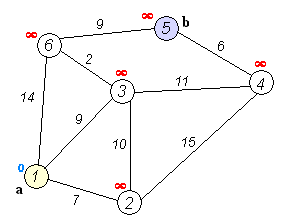

In [38]:
graph = Graph()

graph.insert_edge(7, 1, 2)
graph.insert_edge(7, 2, 1)
graph.insert_edge(9, 1, 3)
graph.insert_edge(9, 3, 1)
graph.insert_edge(14, 1, 6)
graph.insert_edge(14, 6, 1)
graph.insert_edge(10, 2, 3)
graph.insert_edge(10, 3, 2)
graph.insert_edge(15, 2, 4)
graph.insert_edge(15, 4, 2)
graph.insert_edge(11, 3, 4)
graph.insert_edge(11, 4, 3)
graph.insert_edge(2, 3, 6)
graph.insert_edge(2, 6, 3)
graph.insert_edge(9, 6, 5)
graph.insert_edge(9, 5, 6)
graph.insert_edge(6, 4, 5)
graph.insert_edge(6, 5, 4)

print("\nAdjacency List")
pp.pprint(graph.get_adjacency_list())

print("\nAdjacency Matrix")
pp.pprint(graph.get_adjacency_matrix())


Adjacency List
[ None,
  [(2, 7), (3, 9), (6, 14)],
  [(1, 7), (3, 10), (4, 15)],
  [(1, 9), (2, 10), (4, 11), (6, 2)],
  [(2, 15), (3, 11), (5, 6)],
  [(6, 9), (4, 6)],
  [(1, 14), (3, 2), (5, 9)]]

Adjacency Matrix
[ [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 7, 9, 0, 0, 14],
  [0, 7, 0, 10, 15, 0, 0],
  [0, 9, 10, 0, 11, 0, 2],
  [0, 0, 15, 11, 0, 6, 0],
  [0, 0, 0, 0, 6, 0, 9],
  [0, 14, 0, 2, 0, 9, 0]]


In [39]:
def dijkstra(graph, source):
    
    vertices, edges = graph.nodes, graph.edges
    dist = dict()
    prev = dict()
        
    for vertex in vertices:
        dist[vertex.value] = float("inf")
        prev[vertex.value] = None
    
    dist[source] = 0
    Q = vertices.copy()
    while Q:
        u = min(Q, key=lambda vertex: dist[vertex.value])
        Q.remove(u)
        if dist[u.value] == float("inf"):
            break
        for e in u.edges:
            alt = e.value + dist[u.value]
            if alt < dist[e.node_to.value]:
                dist[e.node_to.value] = alt
                prev[e.node_to.value] = u.value
    return dist

In [40]:
dijkstra(graph, 5)

{1: 20, 2: 21, 3: 11, 6: 9, 4: 6, 5: 0}

### Knapsack Problem (Combination Optimization)
- NP-Complete
- Brute Force Solution
    - try all combination and pick the best
    - complexity: O(2^n), n = # of objections -> prefer polynomial time
- Pseudo-Polynomial Time O(nW)
- Dynamic Programming
    - Base Case: Smallest computation

### Travelling Sales Program
- NP-Hard: no known algorithm to solve in polynomial time
- Pseudo-Polynomial Time
- Exact Answer vs. Approximate Answer

## 8. Technical Interview Tips

**Steps to tackle with a problem**
   - Clarifying the Question
   - Generating Inputs & Outputs
   - Generating Test Cases
       - consider null and empty input cases to avoid crush
   - Brainstroming
   - Runtime Analysis
   - Coding
   - Debugging

**Interview Questions**
- [Find the number of islands](https://www.geeksforgeeks.org/find-number-of-islands/)
    - Description: given a boolean 2D matrix, find the number of islands. A group of connected 1s forms an island. 
    - Analysis: this is a variation of the standard problem: “Counting the number of connected components in an undirected graph”.
    - A connected component of an undirected graph is a subgraph in which every two vertices are connected to each other by a path(s), and which is connected to no other vertices outside the subgraph.


In [41]:
M = [[1, 1, 0, 0, 0], [0, 1, 0, 0, 1], [1, 0, 0, 1, 1], [0, 0, 0, 0, 0], [1, 0, 1, 0, 1]]
M

[[1, 1, 0, 0, 0],
 [0, 1, 0, 0, 1],
 [1, 0, 0, 1, 1],
 [0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1]]

In [42]:
def islands_counter(M):
    if M == None or M == []:
        return 0
    island = []
    visited = [[False]*len(M[0]) for _ in range(len(M))]

    row = len(M)
    col = len(M[0])
    icounter = 0
    for i in range(row):
        for j in range(col):
            if not visited[i][j] and M[i][j] == 1:
                island = DFS(i, j, M, row, col, visited)
                icounter += 1
                print('Island {} consists of: {}'.format(icounter, island))
    return icounter

def is_part_of_island(i, j, M, row, col, visited):
    return (0 <= i < row and 0 <= j < col and not visited[i][j] and M[i][j] == 1)

def DFS(i, j, M, row, col, visited):
    island = [(i, j)]
    delta_idx = [(-1,-1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    visited[i][j] = True
    
    for delta_row, delta_col in delta_idx:
        if is_part_of_island(i+delta_row, j+delta_col, M, row, col, visited):
            print('{} is part of island'.format((i+delta_row,j+delta_col)))
            island.extend(DFS(i+delta_row, j+delta_col, M, row, col, visited))    
    return island

In [43]:
islands_counter(M)

(0, 1) is part of island
(1, 1) is part of island
(2, 0) is part of island
Island 1 consists of: [(0, 0), (0, 1), (1, 1), (2, 0)]
(2, 3) is part of island
(2, 4) is part of island
Island 2 consists of: [(1, 4), (2, 3), (2, 4)]
Island 3 consists of: [(4, 0)]
Island 4 consists of: [(4, 2)]
Island 5 consists of: [(4, 4)]


5

**Reflections**
- first, clarify the problem: given a matrix of 1s and 0s, find out the connected 1s and group them as an island, here assumed that all 1s can be connected either horizontally, vertically or diagonally.
- identify the input and output: input is the matrix which represents the location and connectivity of 1s and 0s.
- exceptions such as empty or null matrix should be taken into account of.
- brainstorming: iterate through all elements in the matrix by:
    - starting first with one node (start case (0,0)), if it is 1, check all its 8 neighbors, if there are more 1s, marked them all as visited
    - follow the path until there are no more 1s, increment the counter by 1
    - check the next unvisited node, and repeat the steps above if it is 1
    - stop until there are no more unvisited 1s
- implementation:
    - `islands_counter()` to accept the input, do the iteration and return the output
    - `is_part_of_island()` return `True` if the index (coordinate) is within the right range, and node is unvisited with value equal to 1 
    - `DFS()` to do the check of neighbors recursively, mark all 1s encountered as visited
- print out which node location is a part of an island (status), and all the nodes one island is consisted of (affiliation)
- optimization can be done using class, with # of rows/columns and visited status defined as attribute to avoid arguments passing around

**Mock Interview** with [Pramp](https://www.pramp.com/#/)

**More References**
- Websites
    - [Hackerrank](https://www.hackerrank.com/dashboard)
    - [ProjectEuler](https://projecteuler.net/about)
    - [Interview Tips @ InterviewCake](https://www.interviewcake.com)
    - [Problem Solving with Algorithms and Data Structures using Python](http://interactivepython.org/runestone/static/pythonds/index.html)
- Courses
    - More on graph algorithms with [Intro to Algorithms](https://classroom.udacity.com/courses/cs215)
- Books
    - [Algorithms](https://algs4.cs.princeton.edu/home/)
- Blog post:
    - [5 essential phone screen questions](https://sites.google.com/site/steveyegge2/five-essential-phone-screen-questions), some takeaways:
        1. **Coding.** The candidate has to write some simple code, with correct syntax, in C, C++, or Java. 
        
        2. **OO design.** The candidate has to define basic OO concepts, and come up with classes to model a simple problem.
            - **Terminology**: _class, object, instantiation, method, virtual method, class/static method, static/class initializer, constructor, destructor/finalizer, superclass or base class, subclass or derived class, inheritance, encapsulation, multiple inheritance, delegation/forwarding, composition/aggregation, abstract class, interface/protocol, method overriding, method overloading, polymorphism, is-a versus has-a relationships, method signatures, method visibility (public/private/other)_
            - what classes to define,  what methods in each class, what the class constructors are, what data structures the class will have to maintain, whether any Design Patterns are applicable to this problem.
        
        3. **Scripting and regexes.** The candidate has to describe how to find the phone numbers in 50,000 HTML pages. 
            - why Unix is _Unix_
            - `grep -l -R --perl-regexp "\b(\(\d{3}\)\s*|\d{3}-)\d{3}-\d{4}\b" * > output.txt`
                >grep is a command-line utility for searching plain-text data sets for lines that match a regular expression. Its name comes from the ed command g/re/p (globally search a regular expression and print), which has the same effect: doing a global search with the regular expression and printing all matching lines. Grep was originally developed for the Unix operating system, but later available for all Unix-like systems and some others such as OS-9.
           
                > Unix was originally meant to be a convenient platform for programmers developing software to be run on it and on other systems, rather than for non-programmers.
        
        4. **Data structures** The candidate has to demonstrate basic knowledge of the most common data structures.
            - fundamentals of 'big-O' algorithmic complexity analysis:
                - performance classes: constant-time, logarithmic, linear, polynomial, exponential, factorial
                - find/insert/delete/updata an element in hashtable O(1), balanced-binary-tree O(logN), linked list O(N), sorted array O(logN)
            - data structures: array, vectore, linked list, hashtable, tree(hierarchical), graph(arbitrary)
            - question set 1: what you use them for, why you prefer them for those examples, the operations they typically provide, the big-O performance of those operations, how you traverse them to visit all the elements and what order, at least one typical implementation
            - question set 2: how to implement a map with a tree or list, what is the worst-case insertion performance of a hashtable, and a binary tree, options to implement a priority queue
        
        5. **Bits and bytes.** The candidate has to answer simple questions about bits, bytes, and binary numbers.
            - 2^5 = 32, 2^10 = 1024, 2^16 = 65536
            - AND, OR, NOT, XOR in programming language
            - difference between a bitweise-AND and a logical-AND
            - probable sizes of the primitive data types of a standard 32-bit architecture
            - signed and unsigned types, the range of representable values for that type, whether a specific language support signed vs. unsigned types
            - how to test whether the high-order bit is set in a byte
            - ...